# Tarefa de laboratório 3

## **Sumário**

*   Introdução
*   Análise descritiva
*   Matriz Hat
*   Análise dos Resíduos
*   Testes nos Resíduos
*   Resíduos Escalonados
*   Comparações dos Resíduos Escalonados
*   Gráficos: Resíduos versus Ajuste
*   Transformações
    *   Análise Inicial
    *   Análise dos Resíduos
    *   Resíduos Escalonados
*   Teste de Falta de Ajuste
*   Mínimos Quadrados Ponderados

## Introdução

Este relatório é uma continuação direta do nosso último trabalho, em que construímos, analisamos e testamos alguns modelos de regressão linear múltipla para o conjunto de dados fornecido pelo monitor.

Desta vez, nosso objetivo é melhorar ao máximo os modelos anteriores, analisando principalmente os resíduos e considerando transformações tanto nas covariáveis quanto na variável resposta. Na verdade, já tinhamos feito uma transformação quadrática em uma covariável na última análise, mas agora temos o suporte teórico para analisar se tomamos as decisões corretas e quais os impactos do que estamos fazendo com os dados.

Assim, novamente, estaremos rodando os códigos pelo _goggle Colab_ usando a linguagem _R_, e posteriormente editaremos os textos pela plataforma _Overleaf_.

 Além disso, já começando o relatório, temos que nossas variáveis são:
*   $Y$: fluxo total de calor (kwatts)
*   $X_1$: insolação (watts/$m^2$)
*   $X_2$: posição de foco na direção leste (polegadas)
*   $X_3$: posição de foco na direção sul (polegadas)
*   $X_4$: posição de foco na direção norte (polegadas)
*   $X_5$: hora do dia

Sendo que queremos o melhor modelo que consiga prever o fluxo total de calor em função das covariáveis $X_i$, para $i=1,2,3,4$ ou $5$. E, como já vimos anteriormente, sabemos que as covariáveis _"hora do dia"_, _"posição de foco na direção norte"_ e _"insolação"_ são de fato as significativas, logo focaremos em resolver problemas relacionados principalmente à elas.

## Análise descritiva

Então, em primeiro lugar, vamos rapidamente refazer a análise exploratória e relembrar o comportamento dos dados.

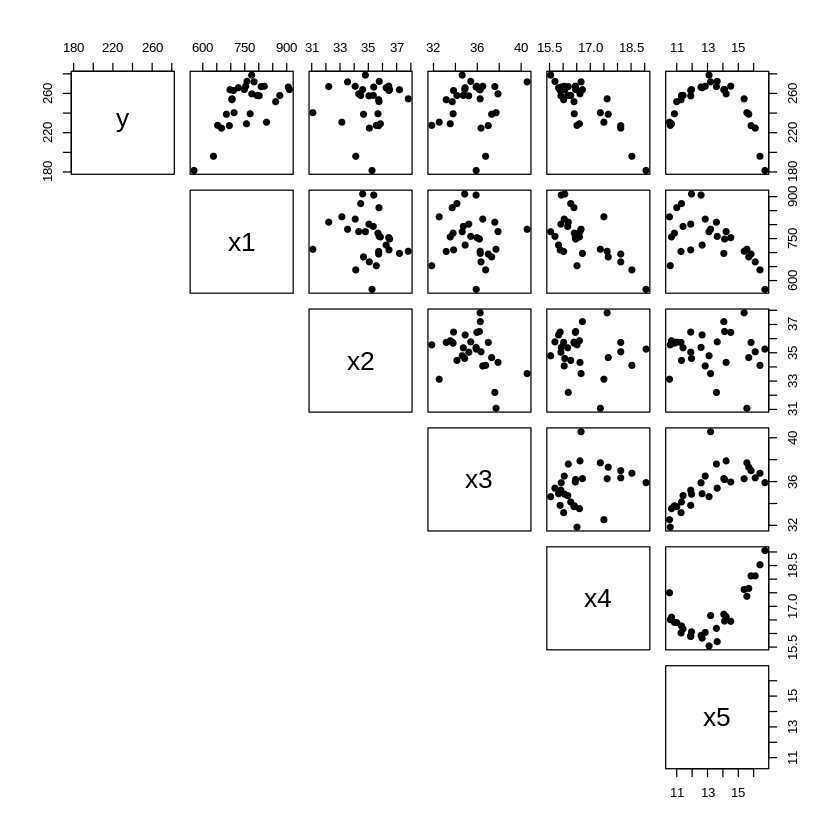

In [ ]:
# Boas praticas
rm(list=ls(all=TRUE)) #limpando o ambiente de execucao
set.seed(33) #setando seed em prol da reproducibilidade
 
# Carregando os dados:
dados <- read.csv('data-table-B2.csv', header=T, dec=',')
Y <- dados[,1]
X <- dados[,c(-1)]
n <- length(Y)

# Graficos de dispersão:
pairs(dados, pch = 19, lower.panel = NULL)

A partir do gráfico, vemos que $X_1$ e $X_4$ parecem ser as covariáveis mais correlacionadas com $Y$, mas elas também aparentam estar correlacionadas, então talvez uma delas não seja necessária. E sobre $X_2$, não há o que dizer, pois não conseguimos identificar padrões relevantes no gráfico. Mas, sobre $X_3$, temos indicações de que há uma relação com $Y$ e com $X_4$, talvez com alguma transformação, ela possa se tornar relevante. E por fim, $X_5$ parece estar relacionada com todas as variáveis do conjunto, demonstrando que é uma variável extremamente necessária, contudo não são relações lineares, então a importância dela deve se mostrar após alguma transformação.

Agora, o próximo passo é conferir a distribuição individual de cada variável.

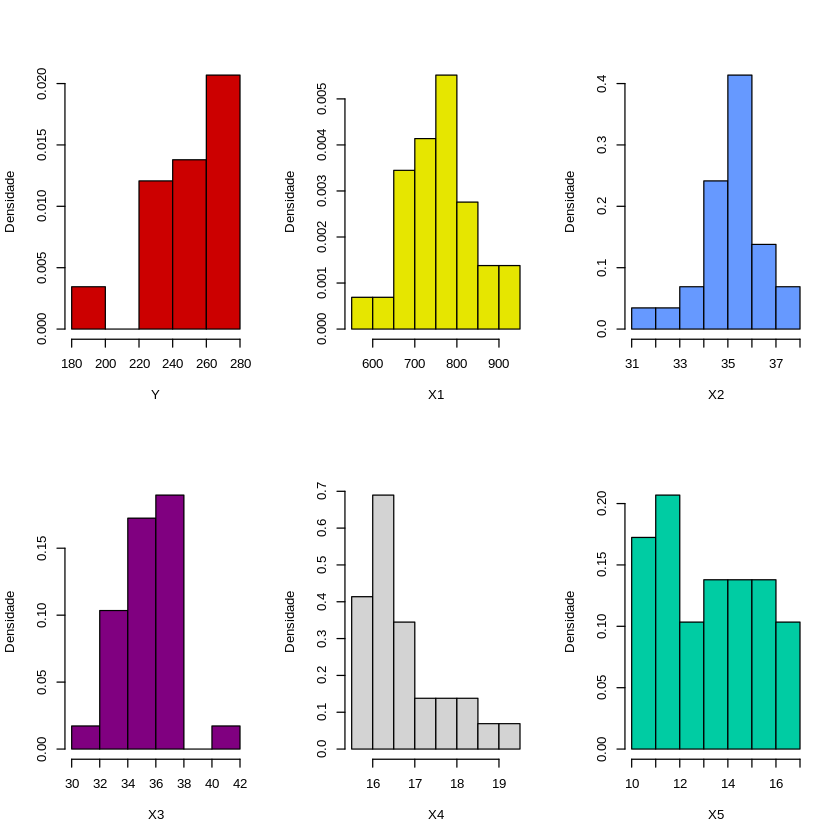

In [ ]:
# Histogramas:
par(mfrow=c(2,3))
hist(dados[,1], xlab='Y', freq=F, main='',
     ylab='Densidade', col='#cc0000')

hist(dados[,2], xlab='X1', freq=F, main='',
     ylab='Densidade', col='#e6e600')

hist(dados[,3], xlab='X2', freq=F, main='',
     ylab='Densidade', col='#6699ff')

hist(dados[,4], xlab='X3', freq=F, main='',
     ylab='Densidade', col='#800080')

hist(dados[,5], xlab='X4', freq=F, main='',
     ylab='Densidade')

hist(dados[,6], xlab='X5', freq=F, main='',
     ylab='Densidade', col='#00cca3')

Vemos então que parece correto assumir que $X_1$ e $X_2$ estão normalmente distribuídas, $X_3$ e $X_4$ obedecem uma distribuição gama, e novamente não conseguimos comentar a respeito das duas últimas, pois $Y$ apresenta assimetria a esquerda e $X_5$ parece ser uniformemente distribuída, mas apresenta uma moda bem clara, então, infelizmente, não conseguimos classificar suas distribuições.

Mesmo assim, vamos continuar e analisar a presença de _outliers_ agora.

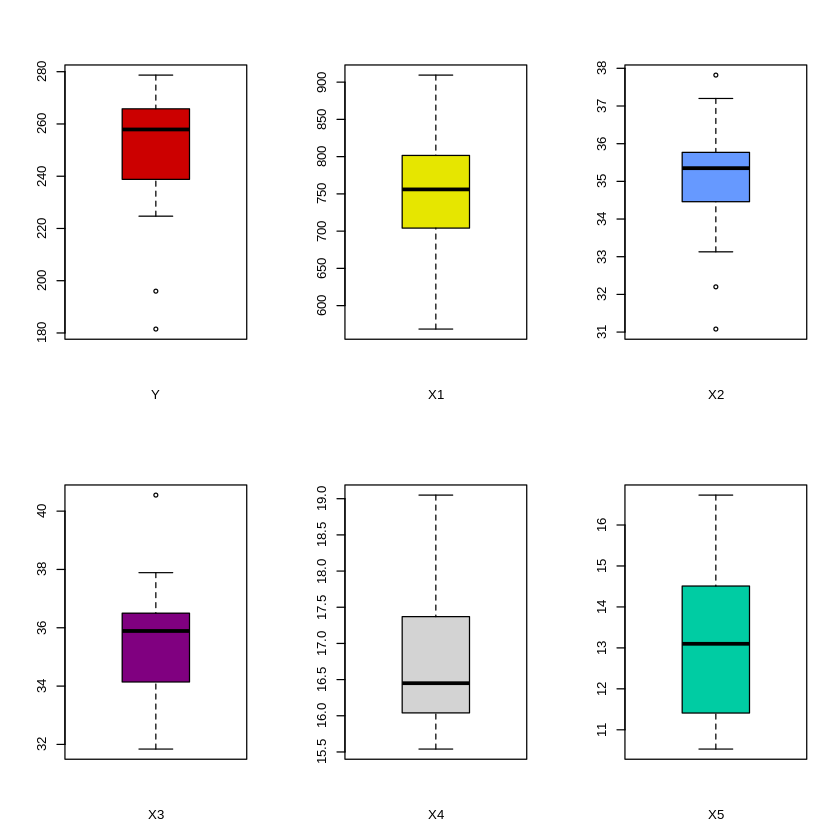

In [ ]:
# Boxplots:
par(mfrow=c(2,3))
boxplot(dados[,1], xlab='Y',
        main='', col='#cc0000')

boxplot(dados[,2], xlab='X1',
        main='', col='#e6e600')

boxplot(dados[,3], xlab='X2',
        main='', col='#6699ff')

boxplot(dados[,4], xlab='X3',
        main='', col='#800080')

boxplot(dados[,5], xlab='X4', main='')

boxplot(dados[,6], xlab='X5',
        main='', col='#00cca3')

Então, para concluir a análise descritiva, vemos que os dados apresentam _outliers_ significantes, que podem influenciar nosso modelo. Inclusivem no último trabalho, eles também foram detectados, mas foram ignorados, pois não consideravámos que eles seriam relevantes e, atualmente, já não acreditamos mais nisto e ficaremos atentos a eles.

Portanto, terminamos a análise exploratória, revimos as principais características dos dados e seguiremos para as aplicações da teoria vista durante as últimas aulas.

## Matriz Hat

Agora, relamente começando a aplicar as técnicas vistas em aula, vamos calcular a Matriz Hat e identificar possíveis _outliers_ a partir da diagonal principal dela.

In [ ]:
# Matriz das variaveis
Ym <- matrix(Y)
k <- length(X)
p <- k + 1
Xm <- matrix(c(rep(1,n), X$x1, X$x2, X$x3, X$x4, X$x5),
            ncol=p, byrow=F)

# Matriz Hat
Mhat = Xm %*% solve( t(Xm)%*%Xm ) %*% t(Xm)

# Print formatado
soma = 0
for(i in 1:n){
  cat(paste('Indice -', i, '  Valor:', round(Mhat[i,i], 4), '\n'))
  soma = soma + Mhat[i,i]
}
cat(paste('A soma total é:', soma, 'e o valor de p é:', p))

Indice - 1   Valor: 0.7055 
Indice - 2   Valor: 0.0998 
Indice - 3   Valor: 0.0977 
Indice - 4   Valor: 0.441 
Indice - 5   Valor: 0.1768 
Indice - 6   Valor: 0.157 
Indice - 7   Valor: 0.2207 
Indice - 8   Valor: 0.2243 
Indice - 9   Valor: 0.1691 
Indice - 10   Valor: 0.1224 
Indice - 11   Valor: 0.0746 
Indice - 12   Valor: 0.0639 
Indice - 13   Valor: 0.0894 
Indice - 14   Valor: 0.2336 
Indice - 15   Valor: 0.1034 
Indice - 16   Valor: 0.4111 
Indice - 17   Valor: 0.1611 
Indice - 18   Valor: 0.2022 
Indice - 19   Valor: 0.2467 
Indice - 20   Valor: 0.1764 
Indice - 21   Valor: 0.1304 
Indice - 22   Valor: 0.2707 
Indice - 23   Valor: 0.1483 
Indice - 24   Valor: 0.3127 
Indice - 25   Valor: 0.3489 
Indice - 26   Valor: 0.1761 
Indice - 27   Valor: 0.1523 
Indice - 28   Valor: 0.1262 
Indice - 29   Valor: 0.1574 
A soma total é: 6.00000000000026 e o valor de p é: 6

Primeiro, temos 29 observações, então se alguma delas estive próxima a média, seu valor de $h_{ii}$ seria aproximadamente 0.20 (pois $\frac{p}{n} = \frac{6}{29} \approx 0.2069$), mas na verdade poucas chegam próximas a este valor, indicando que os dados não se concentram próximos a média.

Além disso, temos seis possíveis _outliers_ em $i = 1,4,16,22,24,25$, sendo que provavelmente a primeira observação é um ponto de alavanca, pois seu valor é muito alto e diferente de todos os outros.

Ademais, como visto em aula, a soma da diagonal principal é igual ao valor de _p_.

## Análise dos Resíduos

O próximo passo é analisar os resíduos, para isto, vamos ajustar um modelo linear com todas as covariáveis, assumindo que o erro segue uma distribuição normal com média zero e variância $\sigma^2$, constante.

In [ ]:
# Ajuste do modelo
modelo <- lm(y ~ x1 +x2 +x3 +x4 +x5, dados)
summary(modelo)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6848  -2.7688   0.6273   3.9166  17.3962 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 325.43612   96.12721   3.385  0.00255 ** 
x1            0.06753    0.02899   2.329  0.02900 *  
x2            2.55198    1.24824   2.044  0.05252 .  
x3            3.80019    1.46114   2.601  0.01598 *  
x4          -22.94947    2.70360  -8.488 1.53e-08 ***
x5            2.41748    1.80829   1.337  0.19433    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.039 on 23 degrees of freedom
Multiple R-squared:  0.8988,	Adjusted R-squared:  0.8768 
F-statistic: 40.84 on 5 and 23 DF,  p-value: 1.077e-10


Dessa vez, assim como fez o monitor, usamos uma função pronta para ajustar o modelo (o que economiza muito tempo) e, como podemos ver pelo resumo, temos que nosso modelo é da forma:

$$\hat{Y} = 325.4 + 0.07X_1 + 2.55X_2 + 3.8X_3 -22.95X_4 + 2.42X_5$$

Além disso, temos várias estatísticas fundamentais, como $R^2$, o $R^2_{ajustado}$, $F_0$, entre outras, mas elas foram discutidas no último relatório, então, vamos nos concentrar em analisar especificamente o comportamento dos resíduos. Para isso, vamos usar os gráficos: "resíduos versus valores ajustados", "resíduos padronizados versus quantis teóricos", "raiz dos resíduos padronizados versus valores ajustados" e "resíduos padronizados versus pontos de alavancagem".

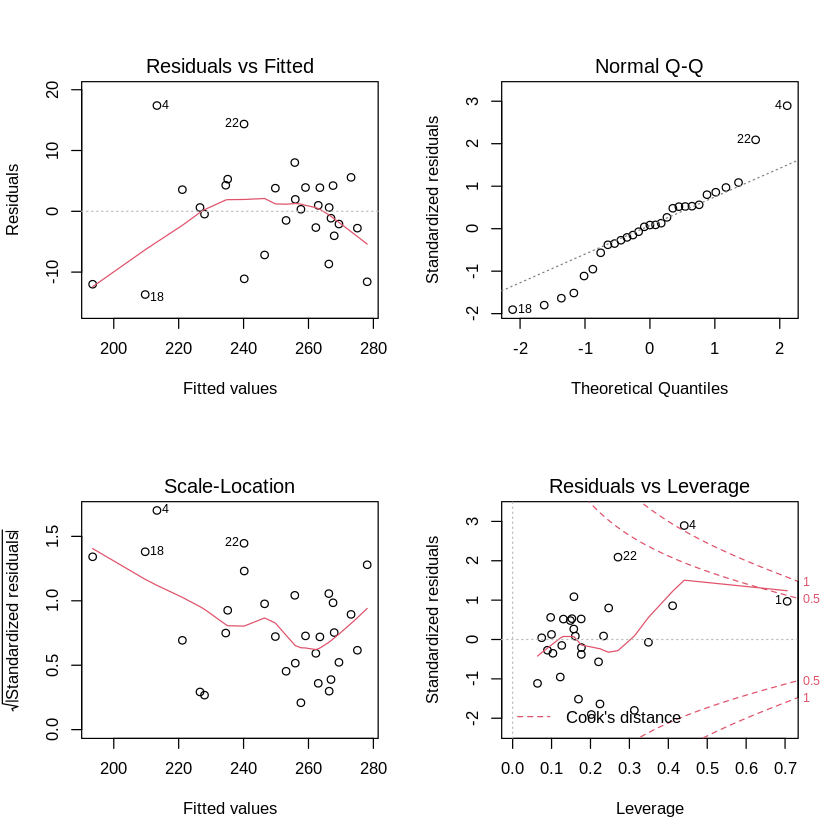

In [ ]:
# Graficos do modelo ajustado
par(mfrow=c(2,2))
plot(modelo)

Portanto, veja que os gráficos nos dão indícios de que a observação 4 e, talvez, as observações 18 e 22 sejam pontos remotos, além disso, quase certamente, a observação 1 é um ponto de alavanca. Por sua vez, os outros pontos parecem bem comportados, apresentando um pequeno erro de ajuste. 

Aliás, como temos uma variável que mede o tempo, vamos fazer o gráfico "resíduos vs tempo" também (inclusive, foi com ele que descobrimos a melhor transformação para o sétimo exercício na última tarefa passada pela professora, então acreditamos que ele é extremamente útil).

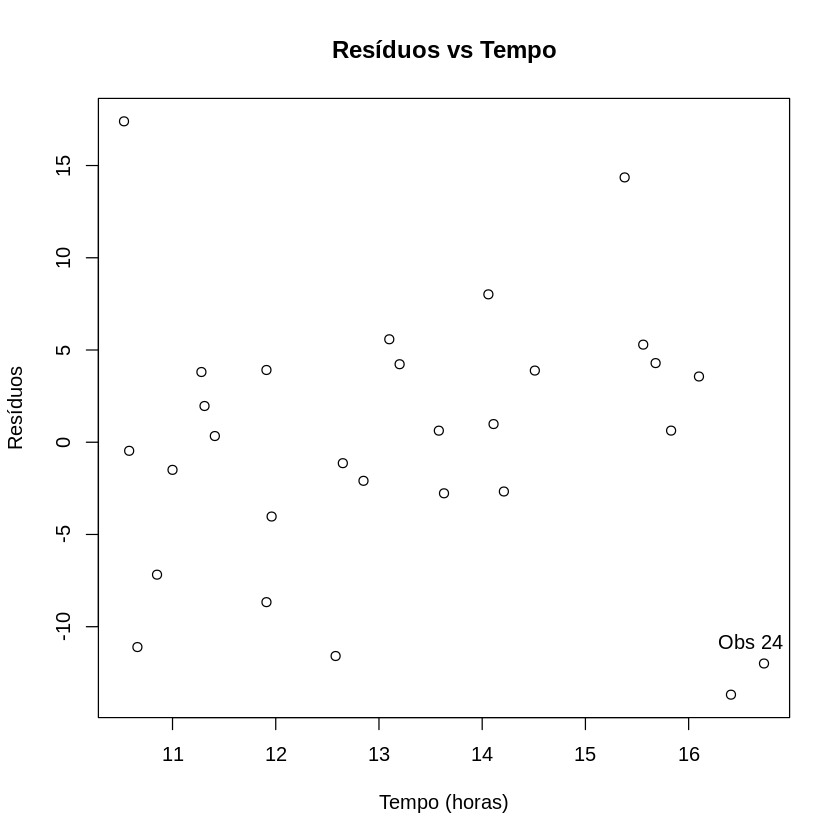

In [ ]:
# Grafico no tempo
plot(dados$x5, modelo$residuals, xlab='Tempo (horas)',
     ylab='Resíduos', main='Resíduos vs Tempo')
text(x = 16.6, y = -10.8, cex = 1,
     labels=paste('Obs', which(dados$x5 == max(dados$x5))[[1]])
     )

Logo, vemos que existe uma tendência aproximadamente linear e crescente na dispersão dos resíduos pelo tempo.

Portanto, agora, temos um conhecimento inicial sobre o que está acontecendo com os resíduos do modelo, mas ainda não é o suficiente, então, nas próximas seções iremos analisá-los detalhadamente.

## Testes nos Resíduos

Na última seção, vimos pelos gráficos como se comportavam os resíduos, mas é mais garantido usarmos teste formalizados para comprovarmos algumas características.

Inicialmente, considere o resumo dos resíduos:

In [ ]:
# Resumo dos residuos
summary(modelo$residuals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-13.6848  -2.7688   0.6273   0.0000   3.9166  17.3962 

Perceba como existem observações que estão distantes do valor esperado para os resíduos (no caso, esperávamos que fosse zero), além disso, a suposta variância constante também não seja verdadeira, pois os valores dos quartis também diferem.

Dito isto, vamos começar pelo teste fundamental de normalidade de Shapiro-Wilk:

In [ ]:
# Teste de normalidade
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.9583, p-value = 0.2984


Veja que, como o _p-value_ é maior do que o nível de significância $\alpha = 0.05$ (sugerido pelo monitor), então rejeitamos a hipótese nula: "a amostra não segue distribuição normal". Ou seja, ao nível de significância de 5%, os resíduos podem ter distribuição normal, e,  na verdade, era o que tinhamos visto pelo gráfico dos quantis, sendo apenas reafirmado.

Então, já temos, com certo nível de confiança, que os resíduos são normalmente distribuídos e sua média amostral sendo zero corrobora com o valor médio assumido. Assim, vamos testar, agora, se a variância é de fato constante, usando o teste de  heterocedasticidade de Breusch-Pagan:

In [ ]:
# Teste de Homocedasticidade
if(!require(lmtest)){
  install.packages('lmtest')
}
library(lmtest)
bptest(modelo)

Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmtest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  modelo
BP = 11.361, df = 5, p-value = 0.04468


Assim como o teste anterior, prestamos atenção no _p-value_ e, dessa vez, ele é menor do que o nível de significância, então rejeitamos a hipótese nula: "a amostra apresenta homocedasticidade". Isto é, a variância não é constante é existe alguma variável que a influência. Infelizmente, novamente os resultados anteriores já apontavam para este resultado.

Contudo, não iremos corrijir este problema da variância e seguiremos sabendo que ele está errado. Inclusive, o próximo teste é conferir a correlação entre as covariáveis:

Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




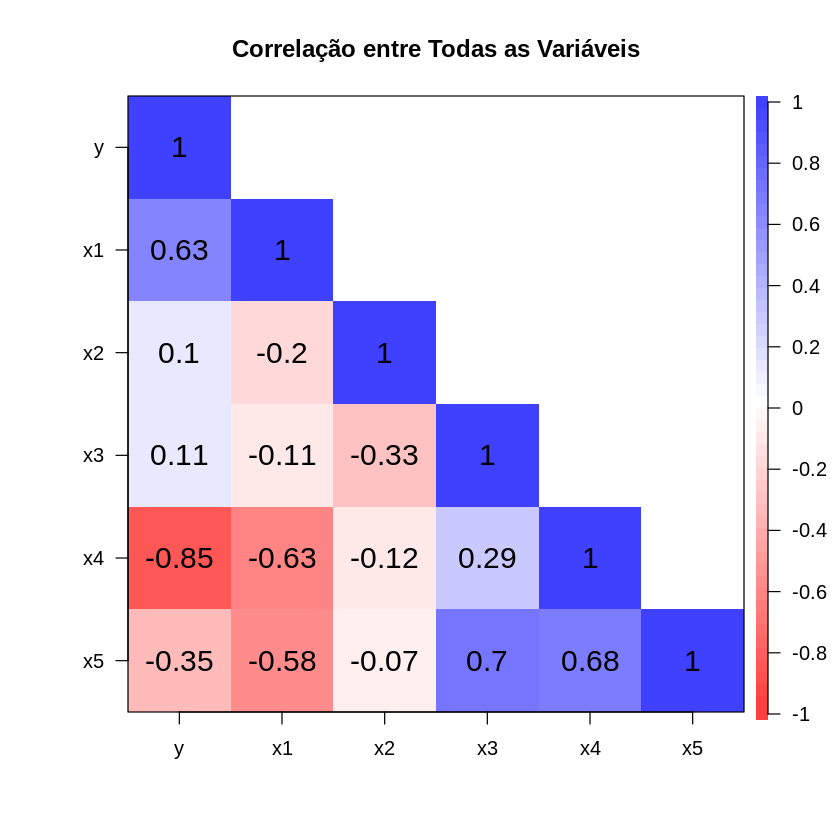

In [ ]:
# Correlacoes - teste de multicolinearidade
if(!require(psych)){
  install.packages('psych')
}
library(psych)
cor.plot(dados, scale=F, upper=F,
         main='Correlação entre Todas as Variáveis')

Antes, é preciso dizer que a função acima calcula o coeficiente de Pearson para medir a correlação. Então, vemos que entre as covariáveis não há fortes correlações (neste caso, "forte" seria um valor em módulo maior do que 0.8), logo, provavelmente não há dados redundantes neste conjunto de dados.

## Resíduos Escalonados

Continuando nosso estudo sobre os resíduos, nas seções anteriores pulamos alguns passos para termos aquelas conclusões, mas agora, fazeremos uma análise mais "tradicional" sobre os resíduos, parecido com o que já foi feito no trabalho anterior.

In [ ]:
# Calculo do residuo
y_est <- Mhat %*% Ym
res <- Ym - y_est

# Soma dos quadrados e Quadrado medio do residuo
SQ_res = t(res)%*%res
SQ_res = SQ_res[1,1]
QM_res = SQ_res/(n-p)

cat(paste('Temos que SQ_res vale', round(SQ_res, 3),
          'e QM_res vale', round(QM_res, 3)))

Temos que SQ_res vale 1486.395 e QM_res vale 64.626

Portanto, o modelo já exibido há duas seções tem estas medidas básicas sobre os resíduos.

Mas para uma análise mais minuciosa, vamos calcular os resíduos padronizados, studentizados internamente e studentizados externamente, que serão analisados apenas no próximo tópico, porém, serão úteis para a procura por pontos remotos no conjunto.

In [ ]:
# Residuos padronizados
res_pd <- res/sqrt(QM_res)
res_pd <- as.vector(res_pd)
round(res_pd, 4)

[1]  0.5261  0.1226  0.5337  2.1640 -0.1863  0.2444 -0.5010 -1.4416 -1.3812
[10] -0.8930  0.0418 -1.0784 -0.2602  0.0780 -0.3322  0.6582  0.0783 -1.7023
[19]  0.6943 -0.3444  0.4833  1.7858  0.4433 -1.4921 -0.0579  0.4736  0.4872
[28] -0.1412  0.9973

In [ ]:
# Residuos Studentizados Internamente
res_si <- res/sqrt(QM_res*(1 - diag(Mhat)))
res_si <- as.vector(res_si)
round(res_si, 4)

[1]  0.9693  0.1292  0.5619  2.8942 -0.2053  0.2662 -0.5675 -1.6369 -1.5153
[10] -0.9533  0.0435 -1.1146 -0.2727  0.0891 -0.3509  0.8577  0.0855 -1.9058
[19]  0.8000 -0.3795  0.5183  2.0912  0.4803 -1.7998 -0.0717  0.5217  0.5292
[28] -0.1511  1.0865

In [ ]:
# Residuos Studentizados Externamente
s2i = ( (n-p)*QM_res - res^2/(1-diag(Mhat)) )/(n-p-1)
res_ti <- res/sqrt(s2i*(1-diag(Mhat)))
res_ti <- as.vector(res_ti)
round(res_ti, 4)

[1]  0.9680  0.1264  0.5533  3.5499 -0.2010  0.2607 -0.5590 -1.7031 -1.5620
[10] -0.9513  0.0425 -1.1208 -0.2671  0.0872 -0.3441  0.8526  0.0837 -2.0312
[19]  0.7935 -0.3723  0.5099  2.2726  0.4722 -1.8990 -0.0701  0.5133  0.5207
[28] -0.1478  1.0910

Assim, temos os valores dos resíduos pedidos, mas, como explicado, vamos observar a "localização" dos dados de X a partir do histograma da medida $s^2_i$ (que é apenas o quadrado médio do resíduo sem a i-ésima observação), de forma a procurar por pontos remotos.

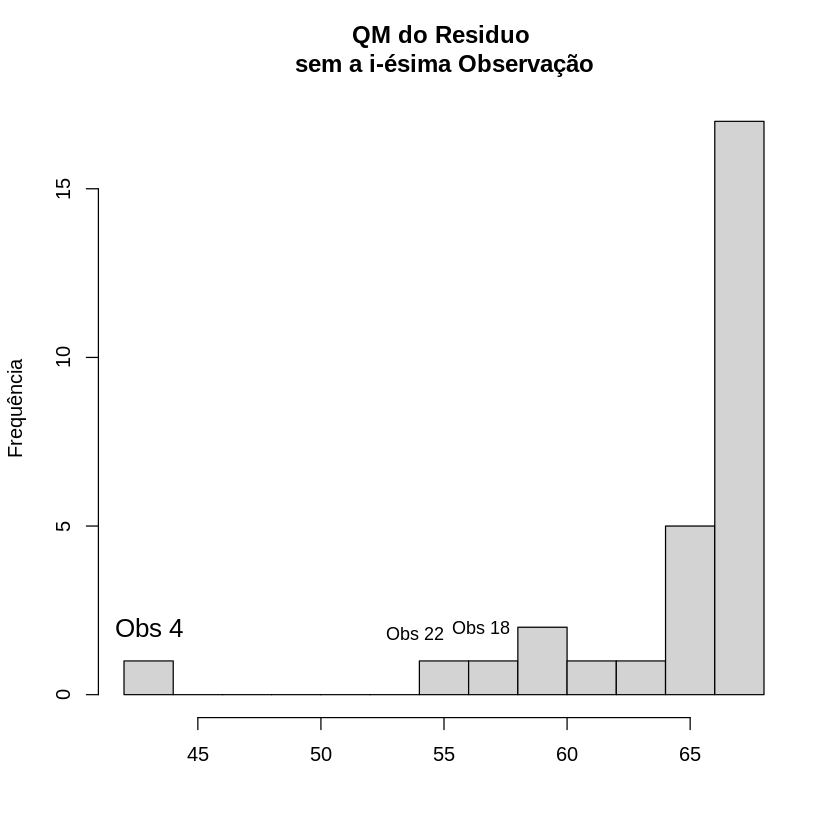

In [ ]:
# Pontos remotos
hist(s2i, xlab='', ylab='Frequência', breaks = 10,
     main='QM do Residuo \nsem a i-ésima Observação')
text(x = 43, y = 2, cex = 1.3,
     labels=paste('Obs', which(s2i < 50)[[1]])
     )
text(x=s2i[18]-0.4, y=2, cex=0.9, labels='Obs 18')
text(x=s2i[22]-0.9, y=1.8, cex=0.9, labels='Obs 22')

Logo, vemos que, assim como o esperado, a observação 4 é de fato um ponto remoto, enquanto que as observações 18 e 22 não estão muito distantes.

## Comparações dos Resíduos Escalonados

Dessa vez, vamos analisar os valores dos resíduos escalonados encontrados no tópico anterior, mas primeiro, vamos organizá-los em uma tabela para facilitar a análise.



In [ ]:
# Tabela dos Residuos
tab_res <- data.frame(Obs_Num = seq(1,n),
                      Residuos = res,
                      Res_Padrao = res_pd,
                      Res_Student_Int = res_si,
                      h_ii = diag(Mhat),
                      Res_Student_Ext = res_ti,
                      Dif_Int_Ext = res_si - res_ti)
round(tab_res, 4)

Obs_Num,Residuos,Res_Padrao,Res_Student_Int,h_ii,Res_Student_Ext,Dif_Int_Ext
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.2291,0.5261,0.9693,0.7055,0.9680,0.0013
2,0.9855,0.1226,0.1292,0.0998,0.1264,0.0028
3,4.2904,0.5337,0.5619,0.0977,0.5533,0.0085
4,17.3962,2.1640,2.8942,0.4410,3.5499,-0.6557
5,-1.4975,-0.1863,-0.2053,0.1768,-0.2010,-0.0043
6,1.9644,0.2444,0.2662,0.1570,0.2607,0.0054
7,-4.0274,-0.5010,-0.5675,0.2207,-0.5590,-0.0085
8,-11.5890,-1.4416,-1.6369,0.2243,-1.7031,0.0663
9,-11.1038,-1.3812,-1.5153,0.1691,-1.5620,0.0467


Consequentemente, junto com as análises dos tópicos anteriores, temos a tabela reafimando que:

1.  a observação 4 é um ponto remoto, pois $e_{(4)}$, $d_{(4)}$, $r_{(4)}$ e $t_{(4)}$ são os maiores valores entre os resíduos;

2. a observação 4 também é influente, porque $t_{(4)}$ está distante de $r_{(4)}$ e portanto o $QM_{res}$ sem a
observação 4 é menor do que o $QM_{res}$ com todas as observações, indicando que o fato de tirarmos a observação 4 faz com que o $QM_{res}$ diminua e portanto ela deve ser influente;

3. a observação 1 é um ponto de alavanca, dessa vez, veja que $h_{11}$ é o maior valor da diagonal da matriz hat, mas os valores $e_{(1)}$, $d_{(1)}$, $r_{(1)}$ e $t_{(1)}$ estão dentro do normal, logo indicando que a observação deve ser um ponto de alavanca.

## Gráficos: Resíduos versus Ajuste

Por fim, para terminarmos nossa análise sobre os resíduos, vamos considerar a dispersão de cada um versus os valores ajustados (principalmente para pensarmos na transformação que melhorará o modelo).

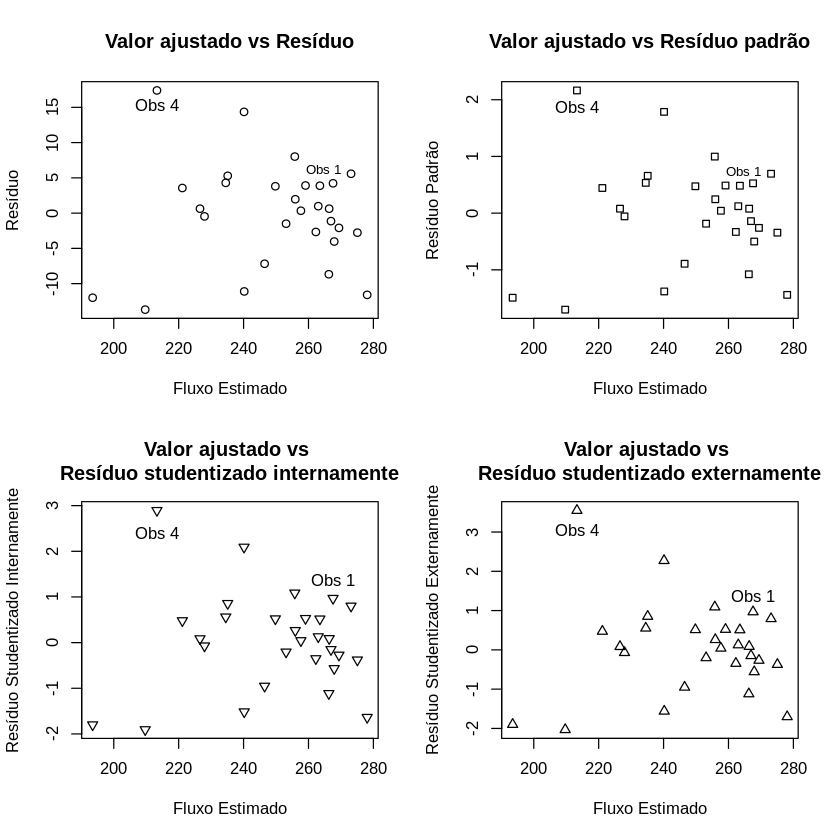

In [ ]:
# Graficos dos residuos
par(mfrow=c(2,2))
plot(y_est, res, xlab='Fluxo Estimado',
     ylab='Resíduo', main='Valor ajustado vs Resíduo')
text(y_est[4], res[4]-2, labels='Obs 4')
text(y_est[1]-3, res[1]+2, labels='Obs 1', cex=0.8)

plot(y_est, res_pd, xlab='Fluxo Estimado',
     ylab='Resíduo Padrão', pch=22,
     main='Valor ajustado vs Resíduo padrão')
text(y_est[4], res_pd[4]-0.3, labels='Obs 4')
text(y_est[1]-3, res_pd[1]+0.2, labels='Obs 1', cex=0.8)

plot(y_est, res_si, xlab='Fluxo Estimado', pch=25,
     ylab='Resíduo Studentizado Internamente',
     main='Valor ajustado vs \nResíduo studentizado internamente')
text(y_est[4], res_si[4]-0.5, labels='Obs 4')
text(y_est[1], res_si[1]+0.4, labels='Obs 1')

plot(y_est, res_ti, xlab='Fluxo Estimado', pch=24,
     ylab='Resíduo Studentizado Externamente',
     main='Valor ajustado vs \nResíduo studentizado externamente')
text(y_est[4], res_ti[4]-0.5, labels='Obs 4')
text(y_est[1], res_ti[1]+0.4, labels='Obs 1')


Portanto, vemos, em todos os gráficos, que, para valores menores do fluxo estiamdo, os resíduos apresentam alta variância eem torno do valor 1, enquanto que para valores maiores, eles apresentam baixa variância em torno do 0, aproximadamente. Inclusive, marcamos as observações mais importantes, resultantes das últimas análises, e percebemos como a observação 4 está distante das demais e influencia até mesmo a percepção da variância.

Enfim, terminamos aqui nossa primeira análise sobre os resíduos e, para a próxima seção, usando-a como ponto de partida, tentaremos corrijir e melhorar o modelo.

## Transformações

Finalmente, após uma longa análise, chegou o momento em que aplicaremos transformações nas variáveis. Na verdade, testamos algumas ideias e decidimos que, para este problema, deve ser relevante observarmos as variáveis indexadas por hora, ou seja, decidimos dividir as variáveis $X_1$: insolação e Y: fluxo total pelo valor do momento, $X_5$, quando as observações foram medidas. Além disso, optamos por remover a observação 4 do conjunto, caso contrário, os mesmo erros apareceriam novamente.

In [ ]:
# Novo conjunto
d <- dados[-4,]
d$y <- d$y / d$x5
d$x1 <- d$x1 / d$x5

n2 = nrow(d)

Desta forma, assim como pedido, vamos refazer as análises de todos os tópicos anteriores, mas focando em principalmente comparar as diferenças entre os dois modelos.

### Análise Inicial

Em primeiro, vamos começar refazendo a análise descritiva do novo conjunto de dados.

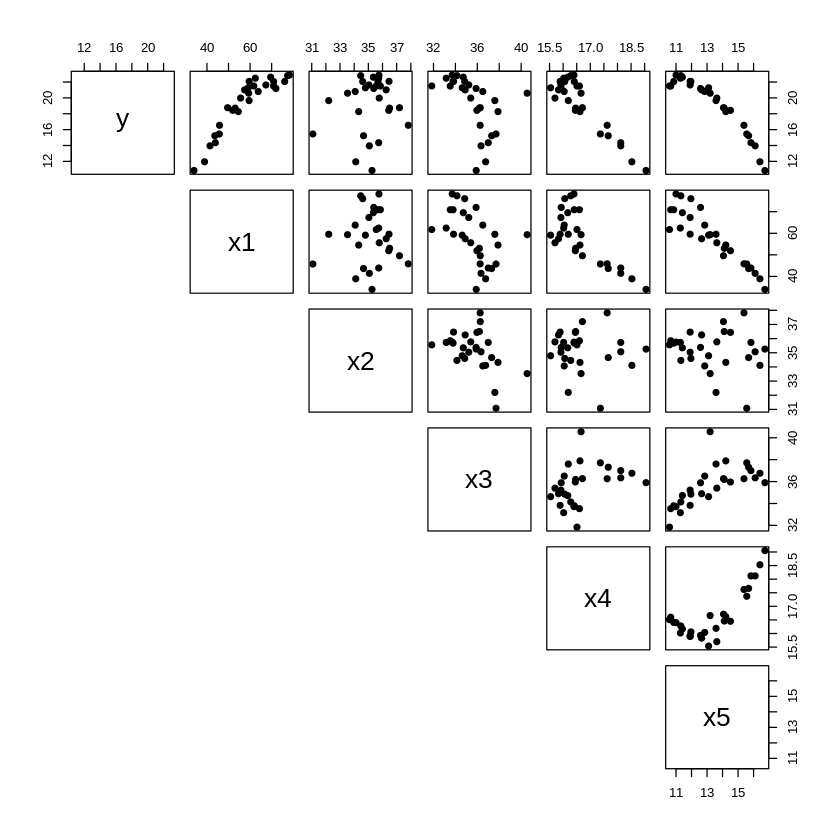

In [ ]:
# Novos graficos de dispersao
pairs(d, lower.panel = NULL, pch = 19)

Aparentemente, a transformação aumentou a correlação de $X_1$ e $X_4$, como de Y com $X_1$, $X_3$ e $X_4$, o que é muito bom para o modelo.

Mas continuando, vamos observar os novos histogramas das variáveis.

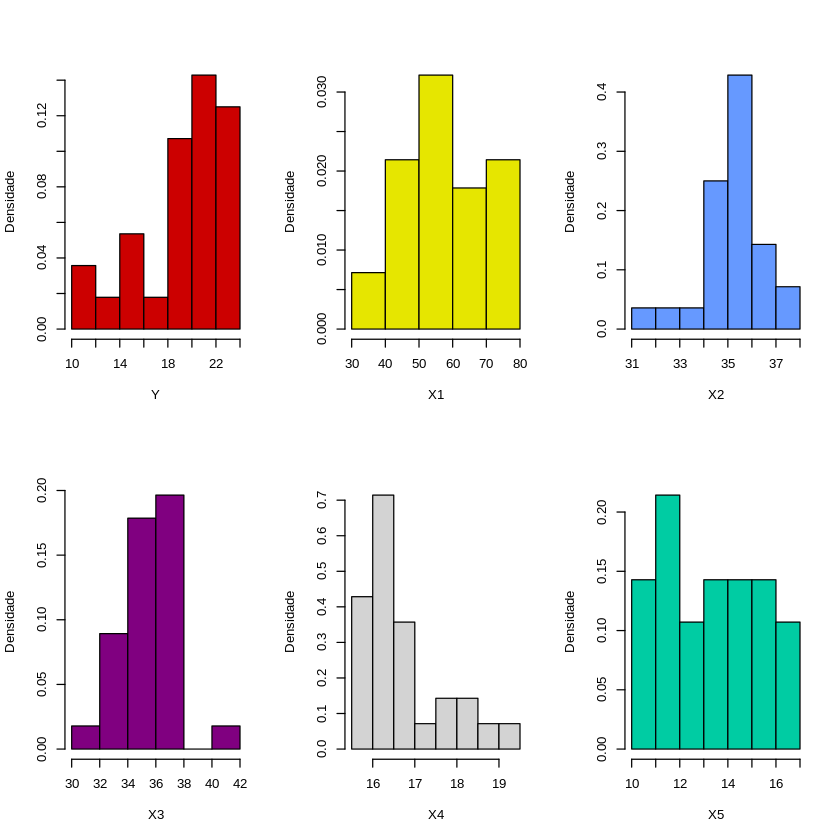

In [ ]:
# Novos histogramas:
par(mfrow=c(2,3))
hist(d[,1], xlab='Y', freq=F, main='',
     ylab='Densidade', col='#cc0000')

hist(d[,2], xlab='X1', freq=F, main='',
     ylab='Densidade', col='#e6e600')

hist(d[,3], xlab='X2', freq=F, main='',
     ylab='Densidade', col='#6699ff')

hist(d[,4], xlab='X3', freq=F, main='',
     ylab='Densidade', col='#800080')

hist(d[,5], xlab='X4', freq=F, main='',
     ylab='Densidade')

hist(d[,6], xlab='X5', freq=F, main='',
     ylab='Densidade', col='#00cca3')

Veja que a assimetria negativa de Y ainda está presente e a covariável $X_1$ parece deixar de apresentar uma óbvia curva normal de distribuição. 

Entretanto, continuando, vamos analisar os _boxplot's_ agora.

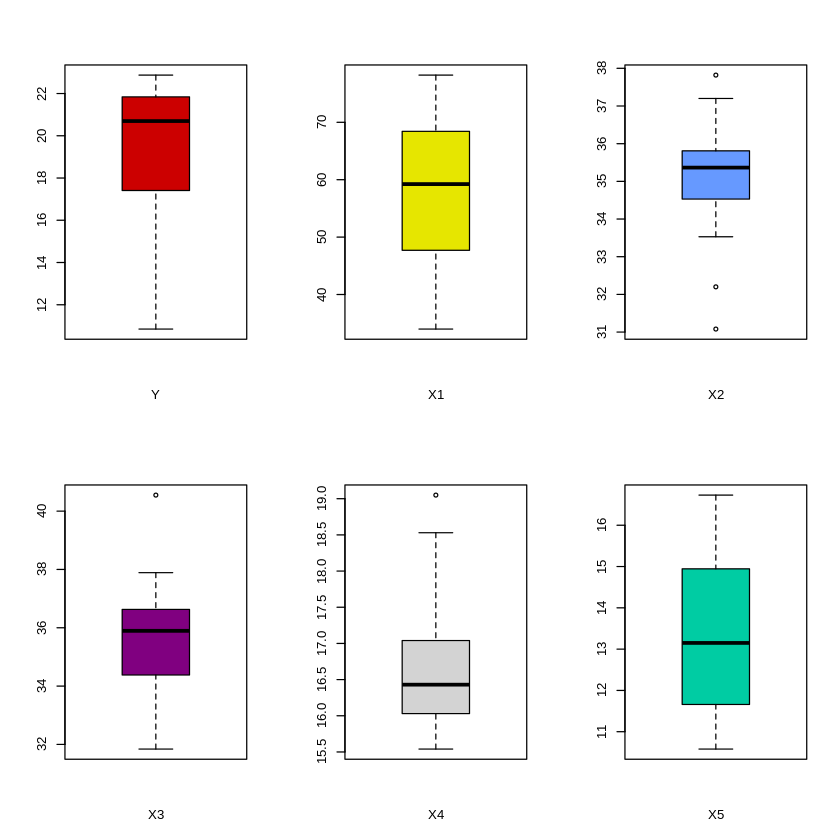

In [ ]:
# Novos boxplots:
par(mfrow=c(2,3))
boxplot(d[,1], xlab='Y', main='', col='#cc0000')

boxplot(d[,2], xlab='X1', main='', col='#e6e600')

boxplot(d[,3], xlab='X2', main='', col='#6699ff')

boxplot(d[,4], xlab='X3', main='', col='#800080')

boxplot(d[,5], xlab='X4', main='')

boxplot(d[,6], xlab='X5', main='', col='#00cca3')

A partir dos gráficos, vemos que, na verdade, $X_1$ ainda pode ter distribuição normal sim, pelo menos é o que parece indicar o gráfico.

Agora, em segundo lugar, vamos analisar a nova matriz hat, para começarmos nosso estudo sobre os possíveis _outliers_, que já não esperamos que estejam presentes.

In [ ]:
# Novas matrizes das variaveis
Ym2 <- matrix(d[,1])
X2 <- d[, -c(1,6)]
k2 <- length(X2)
p2 <- k2 + 1
Xm2 <- matrix(c(rep(1,n2), X2$x1, X2$x2, X2$x3, X2$x4),
            ncol=p2, byrow=F)

# Matriz Hat
Mhat2 = Xm2 %*% solve( t(Xm2)%*%Xm2 ) %*% t(Xm2)
h = diag(Mhat2)

# Print formatado
soma = 0
for(i in 1:n2){
  cat(paste('Indice -', i, '  Valor:', round(h[i], 4), '\n'))
  soma = soma + h[i]
}
cat(paste('A soma total é:', soma, 'e o novo valor de p é:', p2))

Indice - 1   Valor: 0.4324 
Indice - 2   Valor: 0.1125 
Indice - 3   Valor: 0.0969 
Indice - 4   Valor: 0.2318 
Indice - 5   Valor: 0.1926 
Indice - 6   Valor: 0.1418 
Indice - 7   Valor: 0.1263 
Indice - 8   Valor: 0.1463 
Indice - 9   Valor: 0.1142 
Indice - 10   Valor: 0.0726 
Indice - 11   Valor: 0.0638 
Indice - 12   Valor: 0.0878 
Indice - 13   Valor: 0.2362 
Indice - 14   Valor: 0.1056 
Indice - 15   Valor: 0.4225 
Indice - 16   Valor: 0.1533 
Indice - 17   Valor: 0.2136 
Indice - 18   Valor: 0.2039 
Indice - 19   Valor: 0.1715 
Indice - 20   Valor: 0.1101 
Indice - 21   Valor: 0.2613 
Indice - 22   Valor: 0.1351 
Indice - 23   Valor: 0.3203 
Indice - 24   Valor: 0.2673 
Indice - 25   Valor: 0.1377 
Indice - 26   Valor: 0.1359 
Indice - 27   Valor: 0.134 
Indice - 28   Valor: 0.173 
A soma total é: 4.99999999999917 e o novo valor de p é: 5

Veja que decidimos não incluir $X_5$ como uma covariável dessa vez, pois ela já está presente no modelo.

Além disso, os resultados são bem parecidos com os anteriores: a observação 1 continua significativa (provavelmente ainda um ponto de alavanca), a 15 (que antes era 16) também se mostra bem influente, assim como a 23 (antes, 24).
Por outro lado, as observações 21 (antes, 22) e 24 (antes, 25) perderam significância desta vez.

### Análise dos Resíduos

Continuando, vamos assumir novamente que o erro é normalmente distribuído com média zero e variância constante e contruir o modelo com $X'_1, X_2, X_3$ e $X_4$.

In [ ]:
# Novo modelo
mod <- lm(y ~ x1 +x2 +x3 +x4, d)
summary(mod)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50213 -0.39153 -0.03597  0.27745  1.81266 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.23370    9.30735   4.215 0.000329 ***
x1           0.14314    0.02006   7.137 2.87e-07 ***
x2           0.18320    0.11954   1.533 0.139026    
x3          -0.07718    0.10612  -0.727 0.474369    
x4          -1.91857    0.24212  -7.924 5.05e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7362 on 23 degrees of freedom
Multiple R-squared:  0.9609,	Adjusted R-squared:  0.9541 
F-statistic: 141.4 on 4 and 23 DF,  p-value: 7.745e-16


Veja que, antes tinhamos:

$$\hat{Y} = 325.4 + 0.07X_1 + 2.55X_2 + 3.8X_3 -22.95X_4 + 2.42X_5$$

Agora temos:

$$
\begin{align*}
\hat{Y'} &= 0.72 + 0.08X'_1 + 7.17X'_2 + 7.46X'_3 - 20.09X'_4 \iff \\ 
\hat{\frac{Y}{X_5}} &= 0.72 + 0.08\frac{X_1}{X_5} + 7.17\frac{X_2}{X_5} + 7.46\frac{X_3}{X_5} - 20.09\frac{X_4}{X_5}
\end{align*}
\\
$$

Além disso, perceba que agora os resíduos estão proporcionalmente menores, porém, a variância deles ainda não parece constante, por causa da diferença entre os valores do 1º e 3º quartil em relação média, não são próximos.

Dessa forma, no próximo passo faremos os mesmos testes nos resíduos, pois é de fundamental importância para o modelo confirmar aquelas características. Porém, antes, vamos observar os gráficos que complementaram os resultados dos testes.

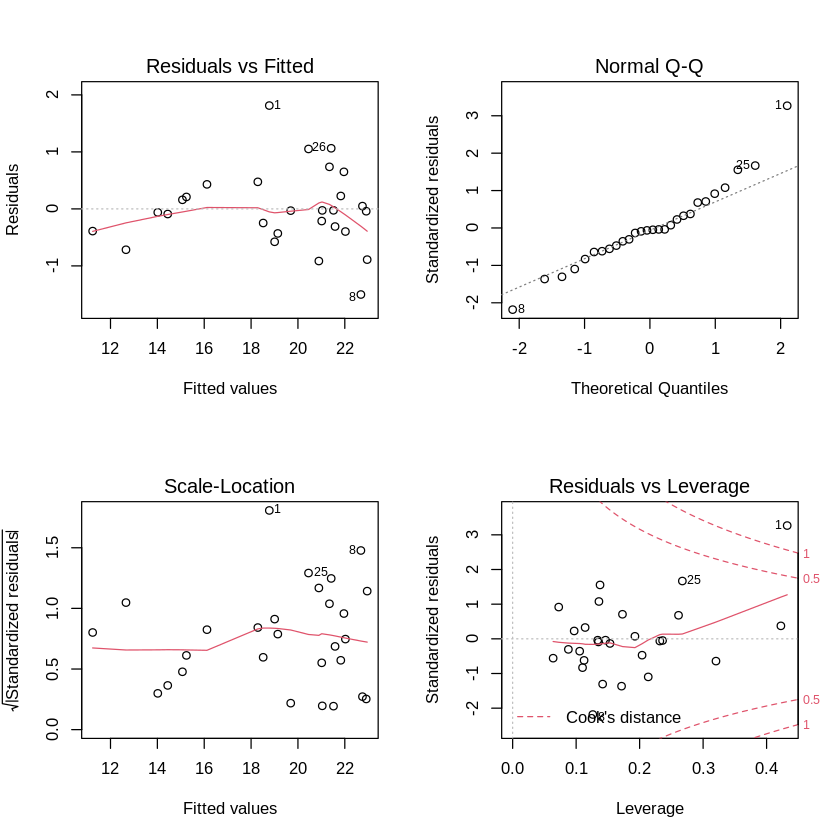

In [ ]:
# Gráficos do novo modelo
par(mfrow=c(2,2))
plot(mod)

Veja que, logo, para este novo modelo os resíduos quase estão perfeitamente distribuídos em torno do zero, sendo um ecelente sinal de qualidade, contudo, da última vez, a observação 4 estava distante e era um _outlier_, agora, a observação 1 está distante e já se mostrou relevante pela análise da matriz hat, então provavelmente ela será um _outlier_ também.

Mas vamos seguir aos testes.

In [ ]:
# Teste de normalidade para o novo modelo
shapiro.test(mod$residuals)


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.9726, p-value = 0.6516


Assim como vimos pelo gráfico dos quartis, segundo o teste, os resíduos do modelo podem apresentar distribuição normal. Veremos quanto a variância a seguir.

In [ ]:
# Teste de Homocedasticidade para o novo modelo
bptest(mod)


	studentized Breusch-Pagan test

data:  mod
BP = 5.3934, df = 4, p-value = 0.2493


Dessa vez, segundo o teste, a variância dos resíduos pode ser considerada constante, o que irá facilitar nossa análise.

Prosseguindo, veremos como estão as correlações entre as variáveis.

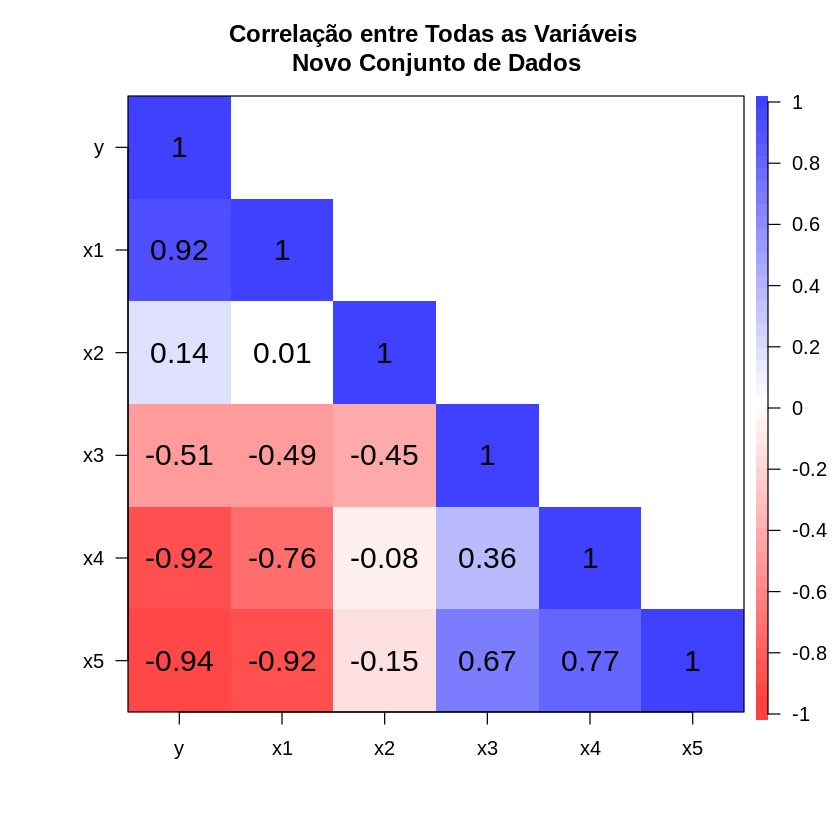

In [ ]:
# Novas correlacoes - teste de multicolinearidade
cor.plot(d, scale=F, upper=F,
         main='Correlação entre Todas as Variáveis \nNovo Conjunto de Dados')

Felizmente, assim como anteriormente, as correlações não são fortes e não precisamos nos preocupar com dados redundantes e _overfitting_ para este modelo.

### Resíduos Escalonados

Nesta última parte deste tópico, veremos os resíduos escalonados, assim como anteriormente, pois eles são extremamente úteis para entendermos os resíduos.
Então, vamos começar com as medidas: soma do quadrado e o quadrado médio.

In [ ]:
# Novos residuo
y_est2 <- Mhat2 %*% Ym2
res2 <- Ym2 - y_est2

# Soma dos quadrados e Quadrado medio
SQ_res2 = t(res2)%*%res2
SQ_res2 = SQ_res2[1,1]
QM_res2 = SQ_res2/(n2-p2)

cat(paste('Temos que SQ_res vale', round(SQ_res, 3),
          'e QM_res vale', round(QM_res, 3)))
cat(paste('\nEnquanto que SQ_res2 vale', round(SQ_res2, 3),
          'e QM_res2 vale', round(QM_res2, 3)))

Temos que SQ_res vale 1486.395 e QM_res vale 64.626
Enquanto que SQ_res2 vale 12.466 e QM_res2 vale 0.542

Perceba que, como já dito, os valores dos resíduos diminuiram proporcionalmente (pois os valores de Y diminuiram também), então temos que agora a $SQ_{res}$ e o $QM_{res}$ são medidas que não podem ser comparadas diretamente, ainda assim, o valor diminuiu bastante entre cada uma.

Mas, talvez mais importante, vamos tomar o quadrado médio do resíduo sem a i-ésima observação, $S^2_{(i)}$, para $i = 1,2,...,28$ e analisar como esta medida se comporta. ou seja, vamos considerar o modo, já feito anteriormente, de procurar por pontos remotos com base na medida $S^2_{(i)}$.

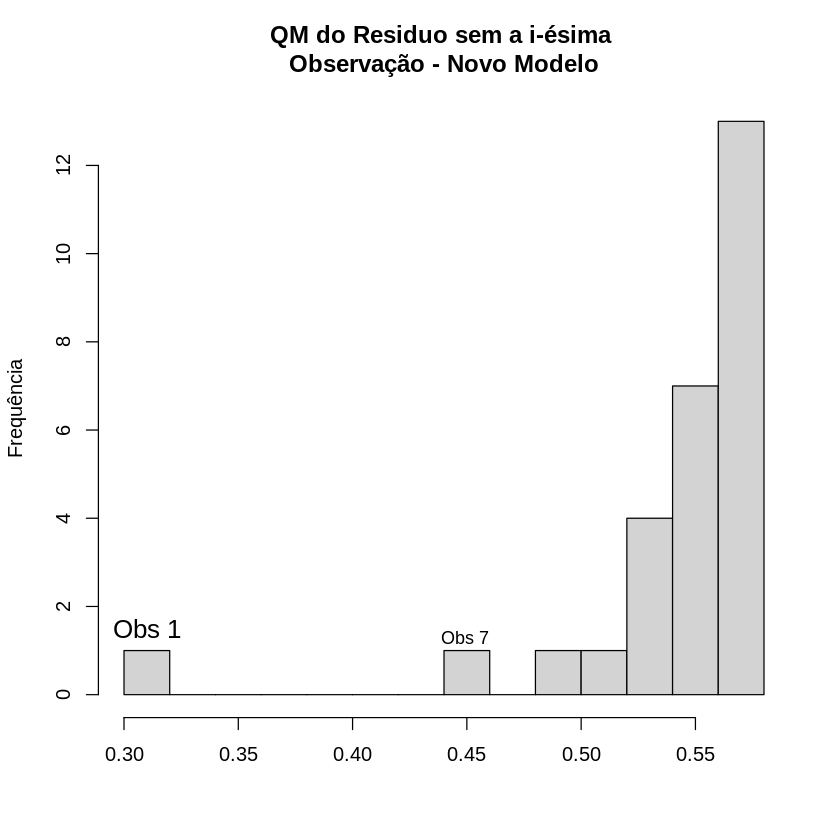

In [ ]:
# Pontos remotos para o novo modelo
s2i_2 = ( (n2-p2)*QM_res2 - res2^2/(1-h) )/(n2-p2-1)

hist(s2i_2, xlab='', ylab='Frequência', breaks = 10,
     main='QM do Residuo sem a i-ésima \nObservação - Novo Modelo')
text(x = 0.31, y = 1.5, cex = 1.3,
     labels=paste('Obs', which(s2i_2 < 0.35)[[1]])
     )
text(x=s2i_2[7], y=1.3, cex=0.9, labels='Obs 7')

Portanto, temos outra evidência de que a observação 1 é um _outlier_ no conjunto de dados, pois agora ela se mostrou um ponto remoto também.

Assim, vejamos agora como estão os valores dos resíduos escalonados.

In [ ]:
# Novos residuos padronizados
res_pd2 <- res2/sqrt(QM_res2)
res_pd2 <- as.vector(res_pd2)
#round(res_pd2, 4)

# Novos residuos studentizados internamente
res_si2 <- res2/sqrt(QM_res2*(1 - h))
res_si2 <- as.vector(res_si2)
#round(res_si2, 4)

# Novos residuos tudentizados externamente
res_ti2 <- res2/sqrt(s2i_2*(1-h))
res_ti2 <- as.vector(res_ti2)
#round(res_ti2, 4)

# Tabela dos novos residuos
tab_res2 <- data.frame(Obs_Num = seq(1,n2),
                      Residuos = res2,
                      Res_Padrao = res_pd2,
                      Res_Student_Int = res_si2,
                      h_ii = h,
                      Res_Student_Ext = res_ti2,
                      Dif_Int_Ext = res_si2 - res_ti2)
round(tab_res2, 4)

Obs_Num,Residuos,Res_Padrao,Res_Student_Int,h_ii,Res_Student_Ext,Dif_Int_Ext
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.8127,2.4622,3.2682,0.4324,4.3675,-1.0993
2,-0.4305,-0.5848,-0.6208,0.1125,-0.6123,-0.0085
3,0.1593,0.2164,0.2277,0.0969,0.2229,0.0048
4,-0.0413,-0.0561,-0.0640,0.2318,-0.0626,-0.0014
5,0.0490,0.0665,0.0740,0.1926,0.0724,0.0016
6,-0.8901,-1.2091,-1.3051,0.1418,-1.3265,0.0214
7,-1.5021,-2.0404,-2.1828,0.1263,-2.3975,0.2147
8,-0.0255,-0.0346,-0.0375,0.1463,-0.0367,-0.0008
9,0.2266,0.3077,0.3270,0.1142,0.3205,0.0064


Logo, perceba que, quase idêntico ao que aconteceu com a oberservação 4 sem a transformação, está acontecendo dessa vez com a observação 1, pois temos provas de que ela é um ponto remoto ($e_{(1)}, d_{(1)}, r_{(1)}$ e $t_{(1)}$ são os maiores valores entre os resíduos) e além disso ela é um ponto influente (com $h_{11}$ sendo o maior valor e $t_{(1)}$ distante de $r_{(1)}$).

Mas, agora, para também complementar a análise dos resíduos escalonados, vamos vê-los em gráficos versus os valores ajustados, igual da última vez.

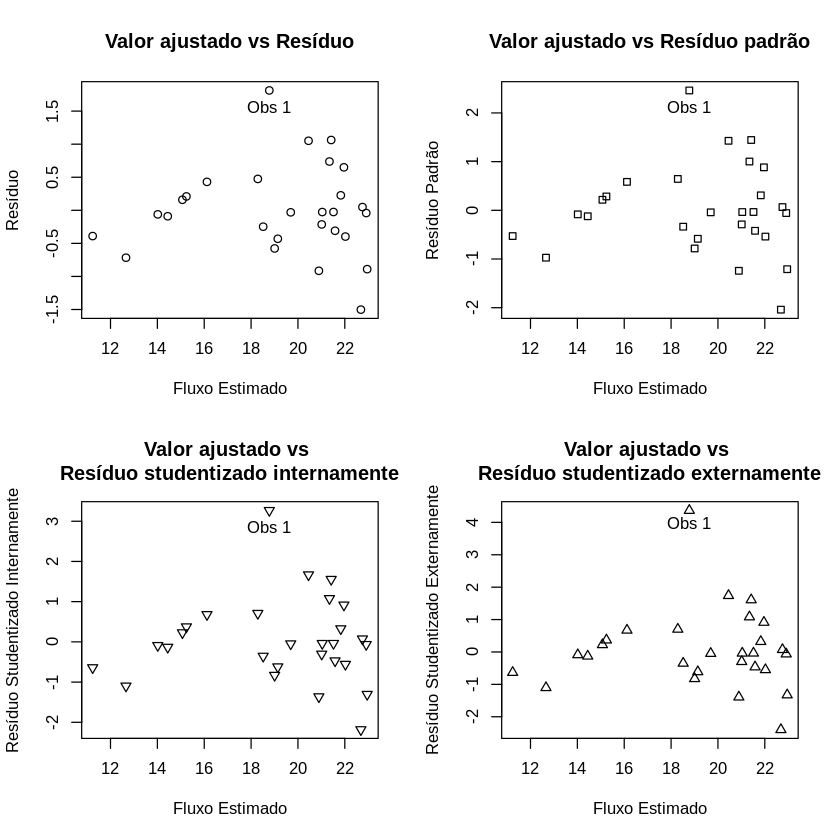

In [ ]:
# Novos graficos dos residuos
par(mfrow=c(2,2))
plot(y_est2, res2, xlab='Fluxo Estimado',
     ylab='Resíduo', main='Valor ajustado vs Resíduo')
text(y_est2[1], res2[1]-0.25, labels='Obs 1')

plot(y_est2, res_pd2, xlab='Fluxo Estimado',
     ylab='Resíduo Padrão', pch=22,
     main='Valor ajustado vs Resíduo padrão')
text(y_est2[1], res_pd2[1]-0.35, labels='Obs 1')

plot(y_est2, res_si2, xlab='Fluxo Estimado', pch=25,
     ylab='Resíduo Studentizado Internamente',
     main='Valor ajustado vs \nResíduo studentizado internamente')
text(y_est2[1], res_si2[1]-0.4, labels='Obs 1')

plot(y_est2, res_ti2, xlab='Fluxo Estimado', pch=24,
     ylab='Resíduo Studentizado Externamente',
     main='Valor ajustado vs \nResíduo studentizado externamente')
text(y_est2[1], res_ti2[1]-0.4, labels='Obs 1')

Logo, vemos como em todos os gráficos a observação 1 parece sempre distante e deslocada do restante, corroborando para a idea de que é um ponto influente, remoto e de alavancagem, pondendo ser considerado um _outlier_.

Portanto, em resumo, acreditamos que fizemos uma boa transformação, pois ela manteve aceitável a correlação entre as covariáveis, manteve os resíduos normalmente distribuídos, indicou que desta vez a variância pode ser considerada constante, diminuiu a $SQ_{res}$ proporcionalmente e vimos que a dispersão dos resíduos escaloandos versus os novos valores ajustados está praticamente linear.

Entretanto, fizemos a transformação e ajustamos um novo modelo sem a observação 4, por conta de toda a análise que fizemos antes deste tópico, sendo que, agora, com resultados parecidos, vimos que a observação 1 é semelhante a 4, mas não vamos refazer toda a análise sem ela, vamos encerrar por aqui a presença do conjunto de dados com que trabalhos, estando concluída uma grande análise sobre os resíduos para dois modelos.

## Teste de Falta de Ajuste

Para esse exercício, vamos utilizar um conjunto de dados simulados, encontrados em https://www.kaggle.com/burnoutminer/heights-and-weights-dataset, que consiste em dados de Altura(em polegadas) e Peso(em libras) de 25 mil jovens.

Com isso, utilizaremos uma amostra aleatória de 100 observações arrendondadas em uma casa decimal desses dados para esse exercício, com $y = Peso$ e $x_1 = Altura$.

In [ ]:
#importando bibliotecas:
library(ggplot2)
library(alr3)
library(dplyr)

Loading required package: car

Loading required package: carData



In [ ]:
#lendo os dados:
df <- read.csv(file='/content/SOCR-HeightWeight.csv')
set.seed(33) #setando uma seed em prol da reproducibilidade
df <- df[sample(nrow(df), 100), ] #amostrando 100 observações aleatoreamente

df <- df %>% #arredondando os valores em uma casa decimal
 mutate_if(is.numeric, round, digits=1)

In [ ]:
head(df)

,Index,Height.Inches.,Weight.Pounds.
,<dbl>,<dbl>,<dbl>
22537,22537,66.2,105.6
1138,1138,70.2,122.4
22492,22492,63.8,117.0
1017,1017,68.4,124.6
7733,7733,68.0,135.4
12517,12517,67.0,127.5


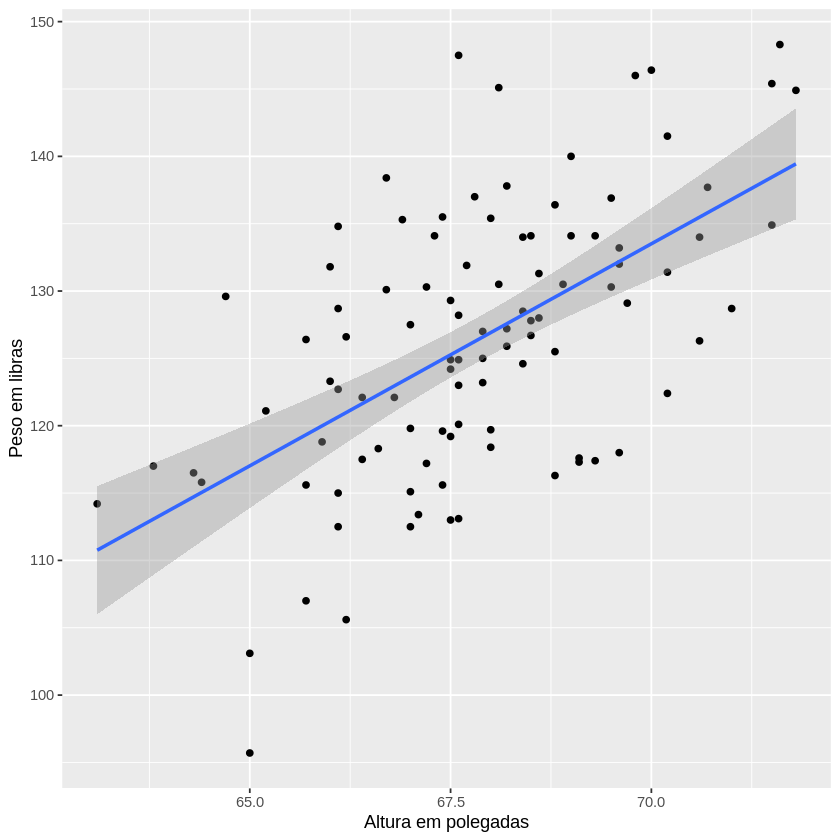

In [ ]:
#plotando o gráfico do modelo ajustado:
ggplot(df, aes(x=Height.Inches., y=Weight.Pounds.)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ x, size = 1) + 
          xlab('Altura em polegadas') +
          ylab('Peso em libras')

Podemos observar a partir do gráfico acima que, apesar da reta ajustada conseguir descrever bem a tendência dos dados, ela não consegue descrever sua dispersão, o que nos faz questionar sobre os resíduos decorrentes da falta de ajuste, que testaremos mais adiante.

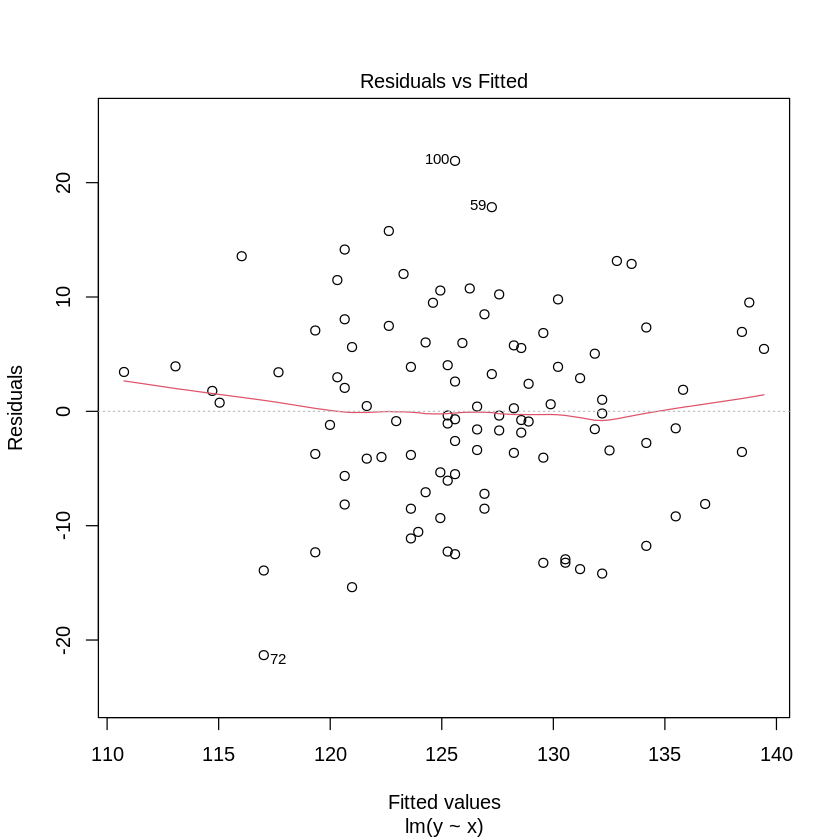

In [ ]:
#plotando o gráfico de resíduos vs valores ajustados:
plot(fit, which=1)

De acordo com o gráfico de "Residuos vs Valores ajustados", percebemos que as obervações estão bem dispersas e sem aparente padrão não-linear. Ainda assim, como dito, precisamos testar a falta de ajuste.

In [ ]:
#definindo o modelo:
x = df$Height.Inches.
y = df$Weight.Pounds.
fit <- lm(y~x)
#plotando a ANOVA com EP e FA:
pureErrorAnova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,3354.843,3354.84302,49.535245,5.230856e-09
Residuals,98,6874.242,70.14533,NA,NA
Lack of fit,48,3487.923,72.66506,1.072921,4.024443e-01
Pure Error,50,3386.319,67.72638,NA,NA


Como podemos observar a partir da tabela ANOVA acima, obtemos $SQ_{FA} = 3487.923$, $SQ_{EP} = 	3386.319$ e a estatística $F_0 = \frac{QM_{FA}}{QM_{EP}} = 1.072921$.

Como $F_{(0.95, 48, 50)} = 1.605$, temos que $F_0 < F_{(1-\alpha, m-2,n-m)}$, com isso podemos concluir que o nosso $F_0$ não é significante e que não há forte evidência de falta de ajuste, com 95% de confiança.

## Mínimos Quadrados Ponderados

Por fim, neste último tópico, vamos simular um conjunto de dados de característica heterocedástica, ou seja, com variabilidade do erro não-constante e usaremos esse pressuposto para aplicarmos o método dos mínimos quadrados ponderados e compararmos os resultados ao nosso modelo original.

In [ ]:
set.seed(33) #setando seed em prol da reproducibilidade
x1 = rep(1:60,1) #gerando 60 valores para x1
sigma2 = x1^(2) #definindo os valores de sigma2
e = rnorm(x1,mean=0,sd=sqrt(sigma2)) #definindo o epsilon
y = 2*x1 + e #definindo o y

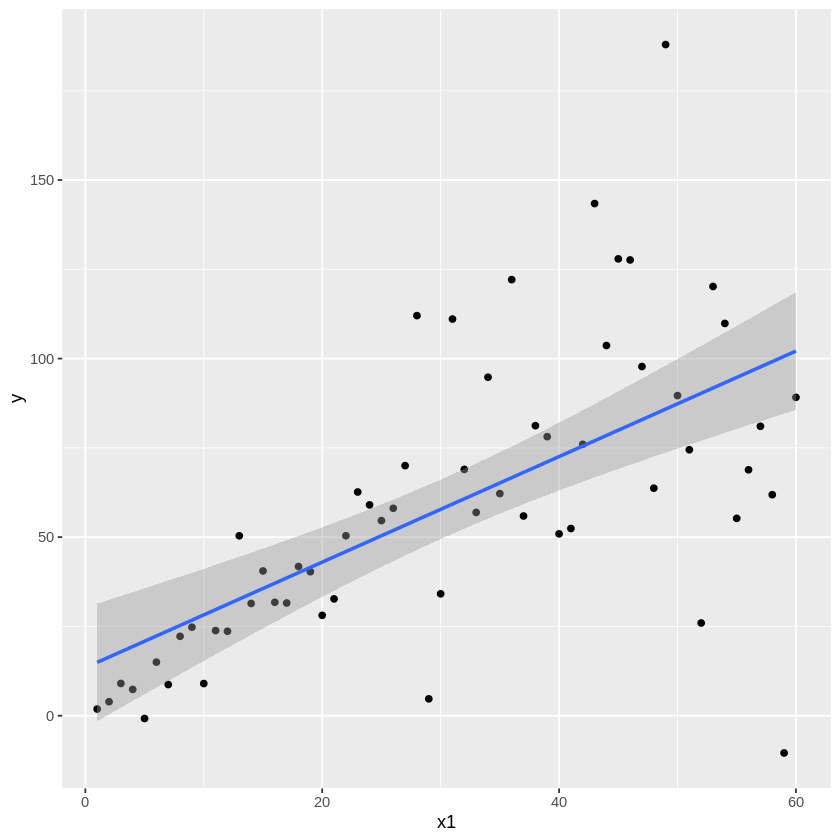

In [ ]:
#plotando o gráfico de dispersão com a reta ajustada:
data <- data.frame (x1 = x1, y = y)
                  
ggplot(data, aes(x=x1, y=y)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ x, size = 1) + 
          xlab('x1') +
          ylab('y')

Podemos observar que nossa simulação desempenhou como desejado, já que a medida em que x1 aumenta, a varição do nosso erro também aumenta.

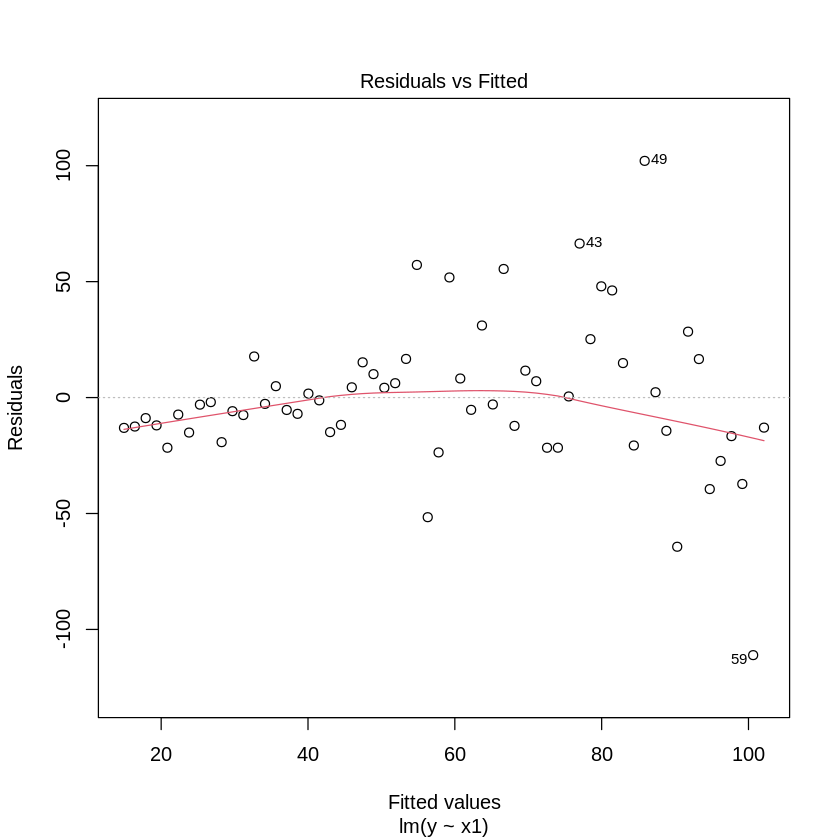

In [ ]:
#plotando o gráfico de resíduos vs valores ajustados:
model <- lm(y~x1)
plot(model, which=1)

E o mesmo pode ser observado com o gráfico de "Resíduos vs Valores ajustados", em que a medida com que os valores ajustados aumentam, a variabilidade dos resíduos também aumenta.

Agora, realizaremos o ajuste com o método dos Mínimos Quadrados Ponderados para comparações posteriores:

In [ ]:
sd.func <- lm(abs(model$residuals) ~ x1) #função do resíduo absoluto(estimador para o desvio padrão)
w <- 1/((sd.func$fitted.values)^2) #peso = 1/sd^2
mqp_model <- lm(y~x1, weights=w) #novo modelo com minimos quadrados ponderados

In [ ]:
#resumo do modelo com ajuste original:
summary(model)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-111.078  -14.477   -3.015   12.429  102.081 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.4596     8.4307   1.596    0.116    
x1            1.4776     0.2404   6.147 7.79e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.24 on 58 degrees of freedom
Multiple R-squared:  0.3945,	Adjusted R-squared:  0.384 
F-statistic: 37.79 on 1 and 58 DF,  p-value: 7.79e-08


In [ ]:
#resumo do modelo com ajuste pelo método dos mínimos quadrados ponderados:
summary(mqp_model)


Call:
lm(formula = y ~ x1, weights = w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.2297 -0.7685  0.0600  0.5695  2.7762 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9419     2.3706   0.397    0.693    
x1            1.9575     0.1533  12.766   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.198 on 58 degrees of freedom
Multiple R-squared:  0.7375,	Adjusted R-squared:  0.733 
F-statistic:   163 on 1 and 58 DF,  p-value: < 2.2e-16


Com base nos resumos podemos observar que houve uma grande diminuição no erro padrão dos resíduos, que foi de $32.24$ no modelo original para $1.2$ no modelo com os Mínimos Quadrados Ponderados o que significa dizer que o modelo atual é muito mais preciso que o anterior.

Também podemos ver uma melhora no $R^2$ de $0.3945$ para $0.7375$, o que implica dizer que o modelo atual consegue explicar melhor a variância do nosso $y$.

A partir da avaliação dessas métricas podemos dizer que o modelo dos Mínimos Quadrados Ponderados nos oferece um melhor ajuste ao dados se compararmos com o modelo original.

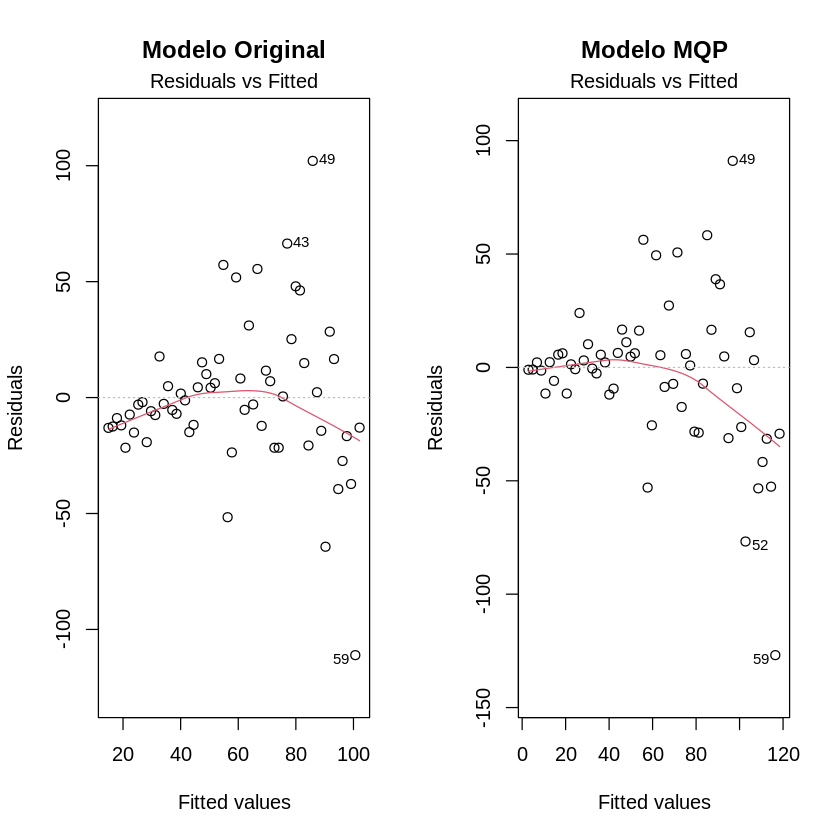

In [ ]:
#plotando os gráficos comparativos:
par(mfrow = c(1,2))
plot(model, which=1, main="Modelo Original")
plot(mqp_model, which=1, main="Modelo MQP")

Podemos observar a partir dos gráficos acima que houveram pequenas variações entre o antes e depois e que mesmo com isso o método dos Mínimos Quadrados Ponderados não conseguiu alterar a característica heterocedástica dos dados.

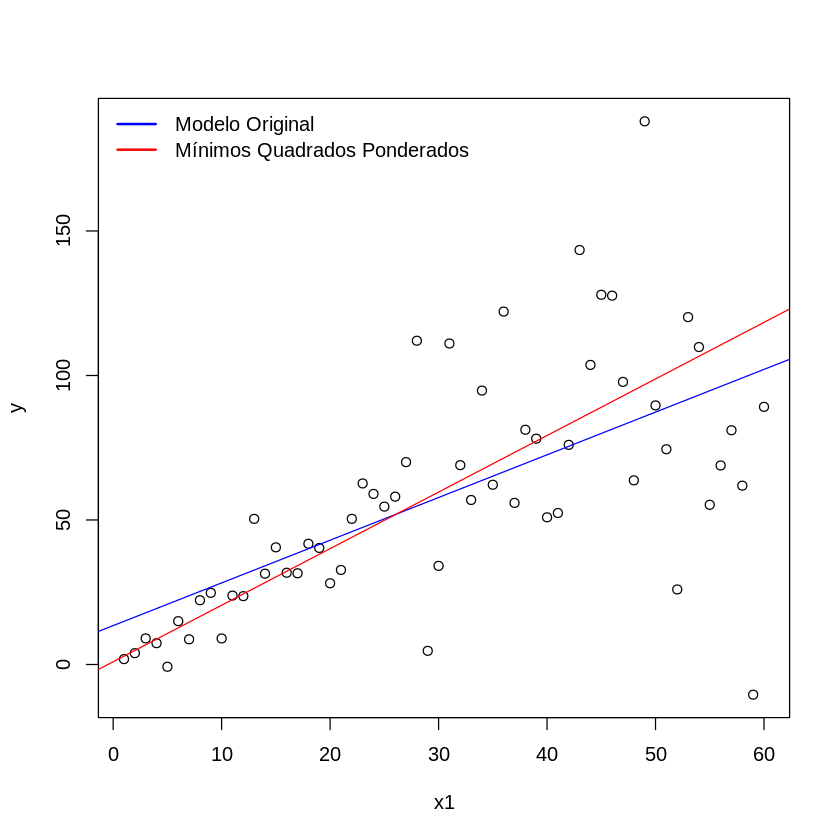

In [ ]:
#plotando um comparativo entre a reta dos dois modelos ajustados:
plot(x1,y)
abline(model, col="blue")
abline(mqp_model,col="red")
legend("topleft", c("Modelo Original","Mínimos Quadrados Ponderados"), lty=c(1,1), lwd=c(2,2), col=c("blue","red"), bty="n")

Por fim, para corroborar com tudo visto anteriormente, temos um comparativo entre as retas ajustadas dos dois modelos, onde, se analisarmos com cautela, podemos ver que a reta dos Mínimos Quadrados Ponderados consegue se ajustar melhor à tendência dos dados. 